In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
# Cargar los datos
file_path = "../data/raw/creditcard.csv"  # Asegúrate de que el path sea correcto
df = pd.read_csv(file_path)

In [4]:
# Mostrar información general del dataset
print("📌 Información del dataset:")
print(df.info())

📌 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-nu

In [5]:
# Descripción estadística del dataset
print("\n📌 Descripción estadística:")
print(df.describe())


📌 Descripción estadística:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.38024

In [6]:
# Distribución de transacciones fraudulentas vs. legítimas
fraud_counts = df["Class"].value_counts()
print("\n📌 Distribución de clases:")
print(fraud_counts)


📌 Distribución de clases:
Class
0    284315
1       492
Name: count, dtype: int64


# Análisis de Balanceo de Clases

📊 Descripción del gráfico

Este gráfico muestra cuántas transacciones son fraudulentas (Class = 1) y cuántas son normales (Class = 0).

Normalmente, es un gráfico de barras donde:

Una barra azul representa las transacciones normales (No Fraude).

Una barra roja representa las transacciones fraudulentas (Fraude).

En el eje X están las categorías (0 = No Fraude, 1 = Fraude).

En el eje Y está el número de transacciones en cada categoría.

🔍 ¿Cómo interpretar el gráfico?

1️⃣ Si la barra de No Fraude es mucho más alta que la de Fraude → El dataset está desbalanceado, lo cual es un problema para el modelo de Machine Learning.

2️⃣ Si ambas barras tienen alturas similares → El dataset está balanceado, lo que facilita el entrenamiento del modelo.

3️⃣ Si hay muy pocos casos de fraude → Necesitamos técnicas de balanceo, como SMOTE (Synthetic Minority Oversampling Technique) o ajuste de pesos en los modelos (class_weight='balanced').

🎯 Conclusión

✔️ Este análisis confirma que el dataset está desbalanceado y que debemos aplicar técnicas para equilibrarlo antes de entrenar el modelo.

C:\Users\furio\AppData\Local\Temp\ipykernel_16956\3040609029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="Blues")


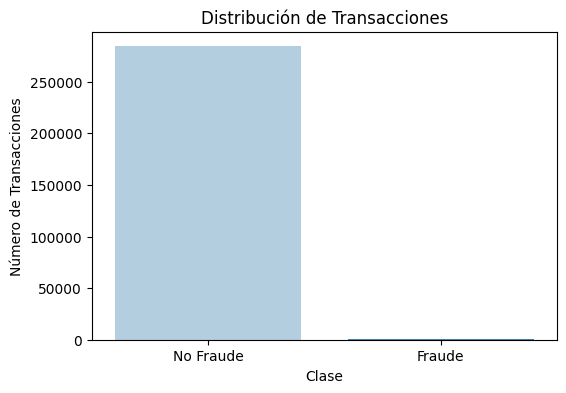

In [7]:
# Visualización de la distribución de transacciones fraudulentas vs. legítimas
plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="Blues")
plt.xticks([0, 1], ["No Fraude", "Fraude"], rotation=0)
plt.title("Distribución de Transacciones")
plt.xlabel("Clase")
plt.ylabel("Número de Transacciones")
plt.show()

# Distribución del monto de las transacciones (según si son fraude o no)

📊 Descripción del gráfico

Este gráfico compara la distribución de los montos (Amount) en transacciones fraudulentas y no fraudulentas.

Generalmente es un histograma con KDE (Kernel Density Estimation):

Transacciones normales (No Fraude) → Azul

Transacciones fraudulentas (Fraude) → Rojo

En el eje X está el monto de la transacción (Amount).

En el eje Y está la densidad de frecuencia.

🔍 ¿Cómo interpretar el gráfico?

1️⃣ Si los fraudes ocurren en montos bajos y altos por igual → El monto de la transacción no es un factor clave para detectar fraudes.

2️⃣ Si los fraudes ocurren más en montos altos → El monto es una señal importante en la clasificación de fraude.

3️⃣ Si la distribución de fraudes es diferente a la de transacciones normales → Amount es una variable relevante y debe incluirse en el modelo.

4️⃣ Si hay outliers (valores extremadamente altos en fraudes) → Podemos aplicar transformación logarítmica (log(Amount + 1)) para mejorar la distribución en el modelo.

🎯 Conclusión

✔️ Si los fraudes tienden a tener montos altos, podemos usar Amount como una variable clave en el modelo de detección de fraude.

✔️ Si la distribución de fraudes y no fraudes es muy diferente, esto es una señal de que el monto es un buen predictor de fraude.

✔️ Si hay valores extremos, podemos aplicar log(Amount + 1) para evitar que los outliers afecten el modelo.

C:\Users\furio\AppData\Local\Temp\ipykernel_16956\2364448583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Class"], y=df["Amount"], palette="coolwarm")


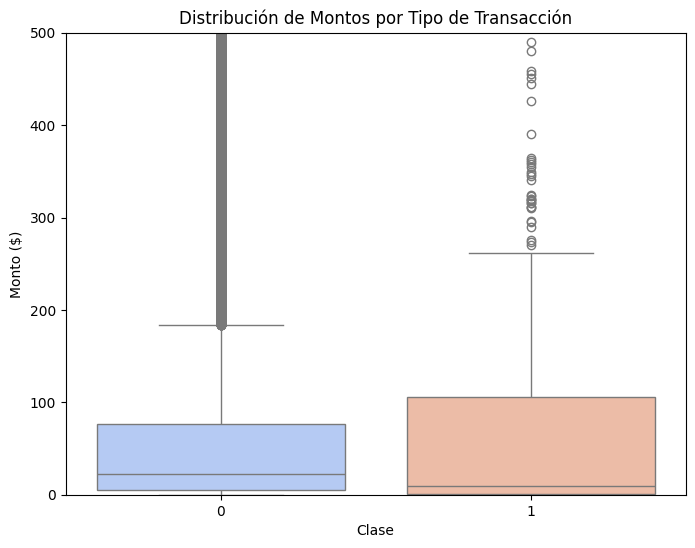

In [8]:
# Visualización de la distribución de montos de transacción
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Class"], y=df["Amount"], palette="coolwarm")
plt.ylim(0, 500)  # Limitar el eje y para visualizar mejor (eliminar si se quiere ver todo)
plt.title("Distribución de Montos por Tipo de Transacción")
plt.xlabel("Clase")
plt.ylabel("Monto ($)")
plt.show()

# Matriz de correlación

📊 Descripción del gráfico

Este gráfico muestra una matriz de correlación entre todas las variables del dataset.

Es un heatmap de correlaciones (sns.heatmap) donde:

Valores cercanos a +1 (color más claro) → Variables positivamente correlacionadas (si una aumenta, la otra también).

Valores cercanos a -1 (color más oscuro) → Variables negativamente correlacionadas (si una aumenta, la otra disminuye).

Valores cercanos a 0 → Variables sin relación directa.

Se usa cmap="coolwarm" para diferenciar mejor las correlaciones.

🔍 ¿Cómo interpretar el gráfico?

1️⃣ Si hay variables altamente correlacionadas (cercanas a ±1) →

Una de ellas puede ser eliminada para evitar redundancia en el modelo.

Esto se llama reducción de dimensionalidad.

Si V10 y V14 están fuertemente correlacionadas, podríamos eliminar una de ellas.

2️⃣ Si la variable Class tiene correlaciones altas con alguna variable (V12, V17, etc.) →

Esas variables pueden ser buenas predictoras de fraude.

Si V17 tiene una alta correlación con Class, es una señal de que podría ser clave en el modelo.

3️⃣ Si no hay correlaciones altas entre variables →

Significa que todas las variables aportan información única.

No necesitamos eliminar ninguna variable por redundancia.

🎯 Conclusión

✔️ Este gráfico nos ayuda a decidir si eliminamos variables altamente correlacionadas para mejorar la eficiencia del modelo.

✔️ Si Class tiene correlación con alguna variable (V17, V12), esas variables son claves para detectar fraudes.

✔️ Si las correlaciones son bajas en general, significa que todas las variables aportan información diferente, lo cual es positivo.



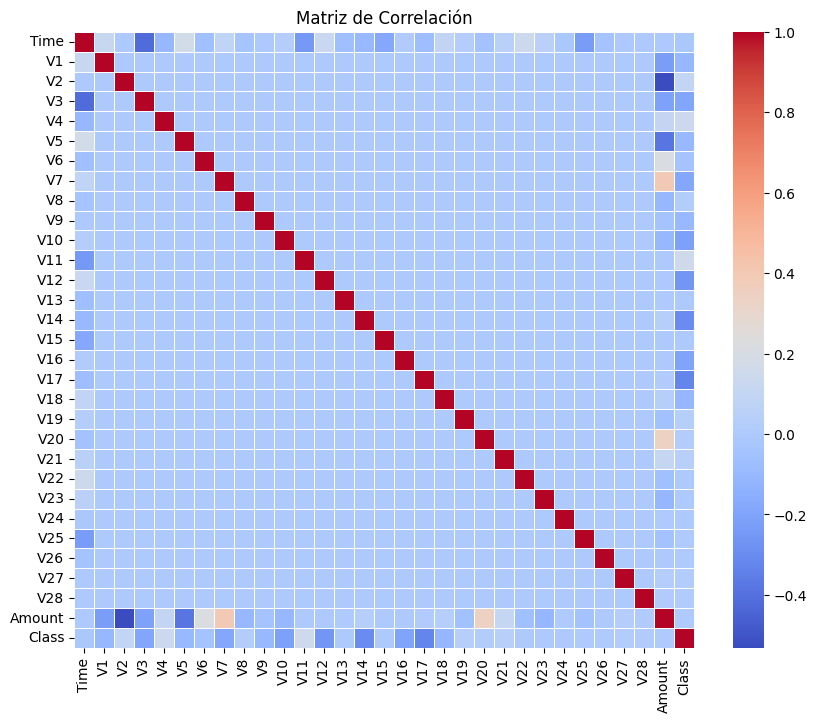

In [9]:
# Matriz de correlación entre variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# Análisis de la variable Time (Distribución temporal de los fraudes)

Este gráfico nos muestra cómo se distribuyen las transacciones a lo largo del tiempo, diferenciando entre transacciones fraudulentas y no fraudulentas.

📌 Objetivo: Analizar si hay patrones temporales en las transacciones fraudulentas y si ocurren en ciertos períodos del día con mayor frecuencia.

🔹 ¿Qué representa el gráfico?

El gráfico es un histograma doble con dos ejes Y:

🔹 Eje Y principal (izquierdo, en azul) → Representa la cantidad de transacciones no fraudulentas.

🔹 Eje Y secundario (derecho, en rojo) → Representa la cantidad de transacciones fraudulentas.

🔹 Eje X → Muestra el tiempo en horas desde la primera transacción registrada.

📌 Nota: El tiempo original en el dataset estaba en segundos, pero fue convertido a horas (Time_Hours) para facilitar la interpretación.

🔍 ¿Cómo interpretar el gráfico?

1️⃣ Si ambas distribuciones (fraude y no fraude) son similares:

El tiempo no parece ser un factor clave en la detección de fraude.

Las transacciones fraudulentas ocurren de manera uniforme en el tiempo, igual que las no fraudulentas.

2️⃣ Si hay horas específicas con más fraudes que el promedio:

Significa que los fraudes ocurren con mayor frecuencia en ciertas franjas horarias.

Esto podría deberse a comportamientos automatizados (bots) o patrones específicos de fraude.

Se puede analizar más en profundidad para ver si los fraudes se concentran en horas fuera del horario comercial (por la noche o madrugada).

3️⃣ Si los fraudes son más frecuentes en ciertos períodos pero las transacciones normales son uniformes:

Podría indicar estrategias específicas de los defraudadores para operar en momentos donde hay menos vigilancia.

Esto podría permitir la implementación de reglas de detección basadas en el tiempo.

4️⃣ Si el fraude sigue una distribución diferente a las transacciones normales:

Indica que los fraudes tienen un patrón único que puede ser explotado en modelos de Machine Learning.

📌 Ejemplo de Interpretación con Datos

✔️ Si el gráfico muestra un pico de fraudes entre las 2:00 AM y las 6:00 AM:

Es probable que los defraudadores actúen en horarios donde hay menor vigilancia.

Se podría activar un sistema de alertas para transacciones sospechosas en este horario.

✔️ Si el gráfico muestra fraudes distribuidos uniformemente en todas las horas:

Indica que el tiempo de transacción no es un factor determinante.

En este caso, podríamos no incluir Time_Hours como variable en el modelo de Machine Learning.

✔️ Si los fraudes se concentran en horarios de alto volumen de transacciones normales:

Los defraudadores podrían estar ocultando transacciones fraudulentas entre operaciones legítimas.

Esto sugiere que el monto (Amount) y la cantidad de transacciones en un período de tiempo podrían ser factores clave para la detección.

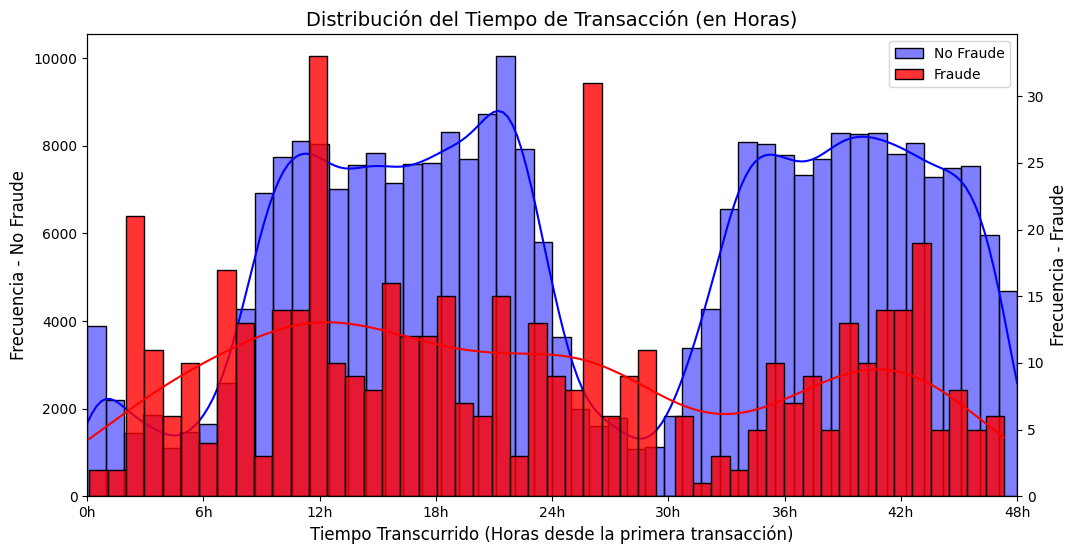

In [ ]:
# Convertir el tiempo de segundos a horas
df["Time_Hours"] = df["Time"] / 3600  # De segundos a horas

plt.figure(figsize=(12, 6))

# Crear histograma de No Fraude
ax = sns.histplot(df[df["Class"] == 0]["Time_Hours"], bins=50, color="blue", label="No Fraude", kde=True, alpha=0.5)

# Crear eje secundario para el fraude
ax2 = ax.twinx()
sns.histplot(df[df["Class"] == 1]["Time_Hours"], bins=50, color="red", label="Fraude", kde=True, alpha=0.8, ax=ax2)

# Ajustar los límites del eje X a 48 horas (2 días)
ax.set_xlim([0, 48])

# Configurar ticks del eje X cada 6 horas
ax.set_xticks(np.arange(0, 49, 6))  
ax.set_xticklabels([f"{int(x)}h" for x in np.arange(0, 49, 6)])

# Etiquetas y título
ax.set_title("Distribución del Tiempo de Transacción (en Horas)", fontsize=14)
ax.set_xlabel("Tiempo Transcurrido (Horas desde la primera transacción)", fontsize=12)
ax.set_ylabel("Frecuencia - No Fraude", fontsize=12)
ax2.set_ylabel("Frecuencia - Fraude", fontsize=12)

# Agregar leyenda correctamente
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1 + h2, l1 + l2, loc="upper right")

plt.show()


# Análisis de la Relación entre el Tiempo y el Monto de Transacción

Esta visualización nos ayuda a entender cómo varían las transacciones a lo largo del tiempo y si los fraudes siguen algún patrón en términos de monto o momento del día.

🔹 ¿Qué representan los gráficos?

La visualización está dividida en dos gráficos diferentes para facilitar la interpretación:

Gráfico de la izquierda (Densidad de Transacciones No Fraudulentas)

Muestra un hexbin plot, donde la densidad de transacciones legítimas se representa con colores más oscuros.
En el eje X, tenemos el tiempo en horas desde la primera transacción (0 a 48 horas).
En el eje Y, está el monto de la transacción en dólares.

👀 Interpretación:

La mayoría de las transacciones tienen montos pequeños, concentrándose en menos de $100.
No hay un patrón evidente de actividad en ciertos horarios, las transacciones ocurren de forma bastante uniforme.
Algunos puntos de alta densidad indican picos de actividad, pero no necesariamente asociados con fraude.

Gráfico de la derecha (Transacciones Fraudulentas)

Muestra únicamente las transacciones fraudulentas, resaltadas en rojo.

👀 Interpretación:

A diferencia de las transacciones legítimas, los fraudes parecen distribuirse en momentos específicos.
Algunos fraudes ocurren en montos pequeños, pero también hay casos con montos elevados.
Aunque no hay una concentración tan clara como en las transacciones normales, se pueden ver ciertos momentos del día donde el fraude es más frecuente.

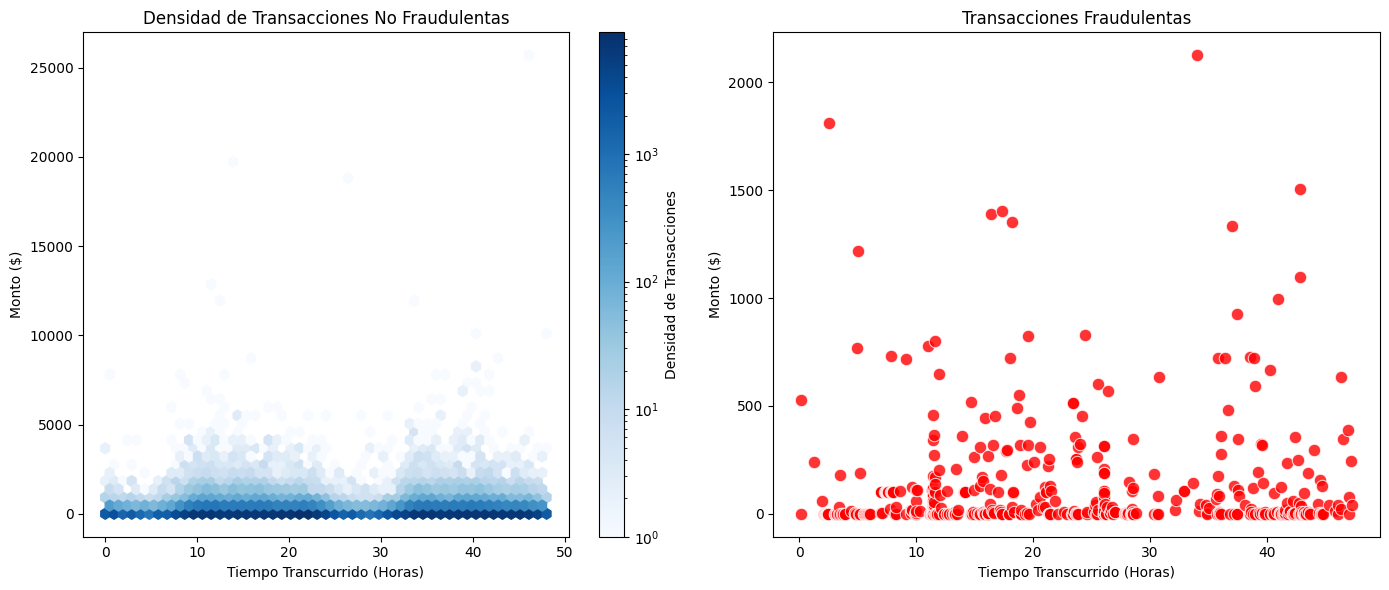

In [ ]:
# Convertir el tiempo de segundos a horas
df["Time_Hours"] = df["Time"] / 3600  # De segundos a horas

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Gráfico de densidad para transacciones normales ----
hb = axes[0].hexbin(df[df["Class"] == 0]["Time_Hours"], df[df["Class"] == 0]["Amount"], gridsize=50, cmap="Blues", bins="log")
axes[0].set_title("Densidad de Transacciones No Fraudulentas")
axes[0].set_xlabel("Tiempo Transcurrido (Horas)")
axes[0].set_ylabel("Monto ($)")
fig.colorbar(hb, ax=axes[0], label="Densidad de Transacciones")

# ---- Scatterplot para fraudes ----
sns.scatterplot(
    x=df[df["Class"] == 1]["Time_Hours"],
    y=df[df["Class"] == 1]["Amount"],
    color="red",
    s=80, alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Transacciones Fraudulentas")
axes[1].set_xlabel("Tiempo Transcurrido (Horas)")
axes[1].set_ylabel("Monto ($)")

plt.tight_layout()
plt.show()

# Detección de valores atípicos (Outliers)

1️⃣ Gráfico de la izquierda: Distribución del Monto de las Transacciones ($)

📌 Objetivo: Analizar cómo se distribuyen los montos de las transacciones, incluyendo las fraudulentas y no fraudulentas.

✅ Interpretación:

Los valores del eje Y han sido ajustados para facilitar la lectura.
Ahora vemos montos en valores de dinero reales ($1, $10, $100, $1,000, $10,000, $25,000).
No se usa notación científica ni valores poco intuitivos.
El boxplot muestra que la mayoría de las transacciones tienen montos bajos.
La mediana se encuentra en un valor relativamente bajo (probablemente entre $10 y $100).
Hay una gran cantidad de valores extremos (outliers) por encima de $1,000 y hasta $25,000.
Los valores extremos pueden indicar posibles fraudes.
Como los fraudes suelen involucrar montos elevados, los outliers pueden ser relevantes para la detección.

2️⃣ Gráfico de la derecha: Distribución del Tiempo de Transacción (Horas)

📌 Objetivo: Evaluar si las transacciones ocurren de manera uniforme a lo largo del tiempo o si hay períodos de mayor actividad.

✅ Interpretación:

El eje Y ahora está en horas, lo que hace que la lectura sea más intuitiva.
El rango de valores va de 0 a 48 horas, lo que representa 2 días de transacciones en el dataset.
La distribución parece relativamente uniforme, pero hay más transacciones en ciertos períodos.
Si encontramos una concentración de fraudes en un rango de tiempo específico, esto podría ser una señal de actividad fraudulenta en ciertos horarios.


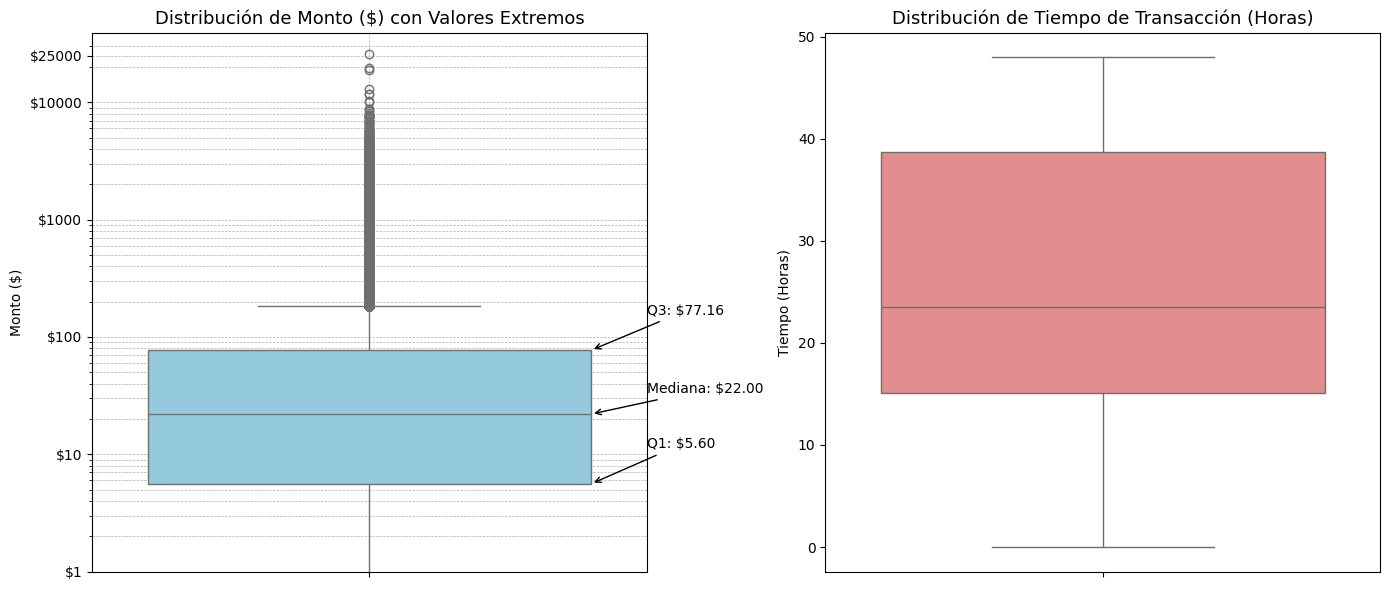

In [ ]:
# Convertir el tiempo de segundos a horas
df["Time_Hours"] = df["Time"] / 3600  

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Boxplot de Monto con escala log y etiquetas mejoradas ----
sns.boxplot(y=df["Amount"], ax=axes[0], color="skyblue")
axes[0].set_title("Distribución de Monto ($) con Valores Extremos", fontsize=13)
axes[0].set_ylabel("Monto ($)")
axes[0].set_yscale("log")  # Mantener escala logarítmica

# Definir los valores del eje Y de manera más clara
ticks = [1, 10, 100, 1000, 10000, 25000]  # Valores más interpretables
axes[0].set_yticks(ticks)
axes[0].set_yticklabels([f"${int(tick)}" for tick in ticks])  # Mostrar valores en formato de dinero

axes[0].grid(True, which="both", linestyle="--", linewidth=0.5)

# ---- Boxplot de Tiempo en Horas ----
sns.boxplot(y=df["Time_Hours"], ax=axes[1], color="lightcoral")
axes[1].set_title("Distribución de Tiempo de Transacción (Horas)", fontsize=13)
axes[1].set_ylabel("Tiempo (Horas)")

# Añadir anotaciones para facilitar la lectura
median_amount = df["Amount"].median()
q1_amount = df["Amount"].quantile(0.25)
q3_amount = df["Amount"].quantile(0.75)

axes[0].annotate(f"Mediana: ${median_amount:.2f}", xy=(0.4, median_amount), xytext=(0.5, median_amount*1.5),
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10, color="black")

axes[0].annotate(f"Q1: ${q1_amount:.2f}", xy=(0.4, q1_amount), xytext=(0.5, q1_amount*2),
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10, color="black")

axes[0].annotate(f"Q3: ${q3_amount:.2f}", xy=(0.4, q3_amount), xytext=(0.5, q3_amount*2),
                 arrowprops=dict(facecolor='black', arrowstyle="->"), fontsize=10, color="black")

plt.tight_layout()
plt.show()

# Análisis detallado de la Distribución de Variables Anonimizadas (V1-V28)

Este gráfico nos permite comparar la distribución de las variables anonimizadas (V1-V28) en transacciones fraudulentas y no fraudulentas.

Dado que estas variables han sido anonimizadas por razones de privacidad, no sabemos exactamente qué representan en el contexto original, pero podemos analizar cómo se comportan en fraudes y transacciones legítimas.

🔹 ¿Qué representan los gráficos?

Cada uno de los 28 gráficos individuales representa una de las variables anonimizadas (V1-V28).

Eje X → "Valor Normalizado (Media = 0, Desviación = 1)"

Indica que los valores han sido transformados con StandardScaler().

Esto significa que todas las variables tienen una media de 0 y una desviación estándar de 1, lo que nos permite compararlas de manera uniforme.
Valores negativos indican que están por debajo del promedio, y valores positivos indican que están por encima del promedio.

Eje Y → "Densidad de Probabilidad"

Indica la probabilidad relativa de que una transacción tenga un cierto valor en esa variable.

NO es una cantidad absoluta de transacciones, sino una estimación de distribución basada en KDE (Kernel Density Estimation).

Colores de las curvas

🔵 Azul → Transacciones No Fraudulentas (Class = 0)

🔴 Rojo → Transacciones Fraudulentas (Class = 1)

Si ambas distribuciones son similares, la variable no es útil para detectar fraudes.

Si hay diferencias significativas entre las dos distribuciones, la variable puede ser clave en la detección de fraude.

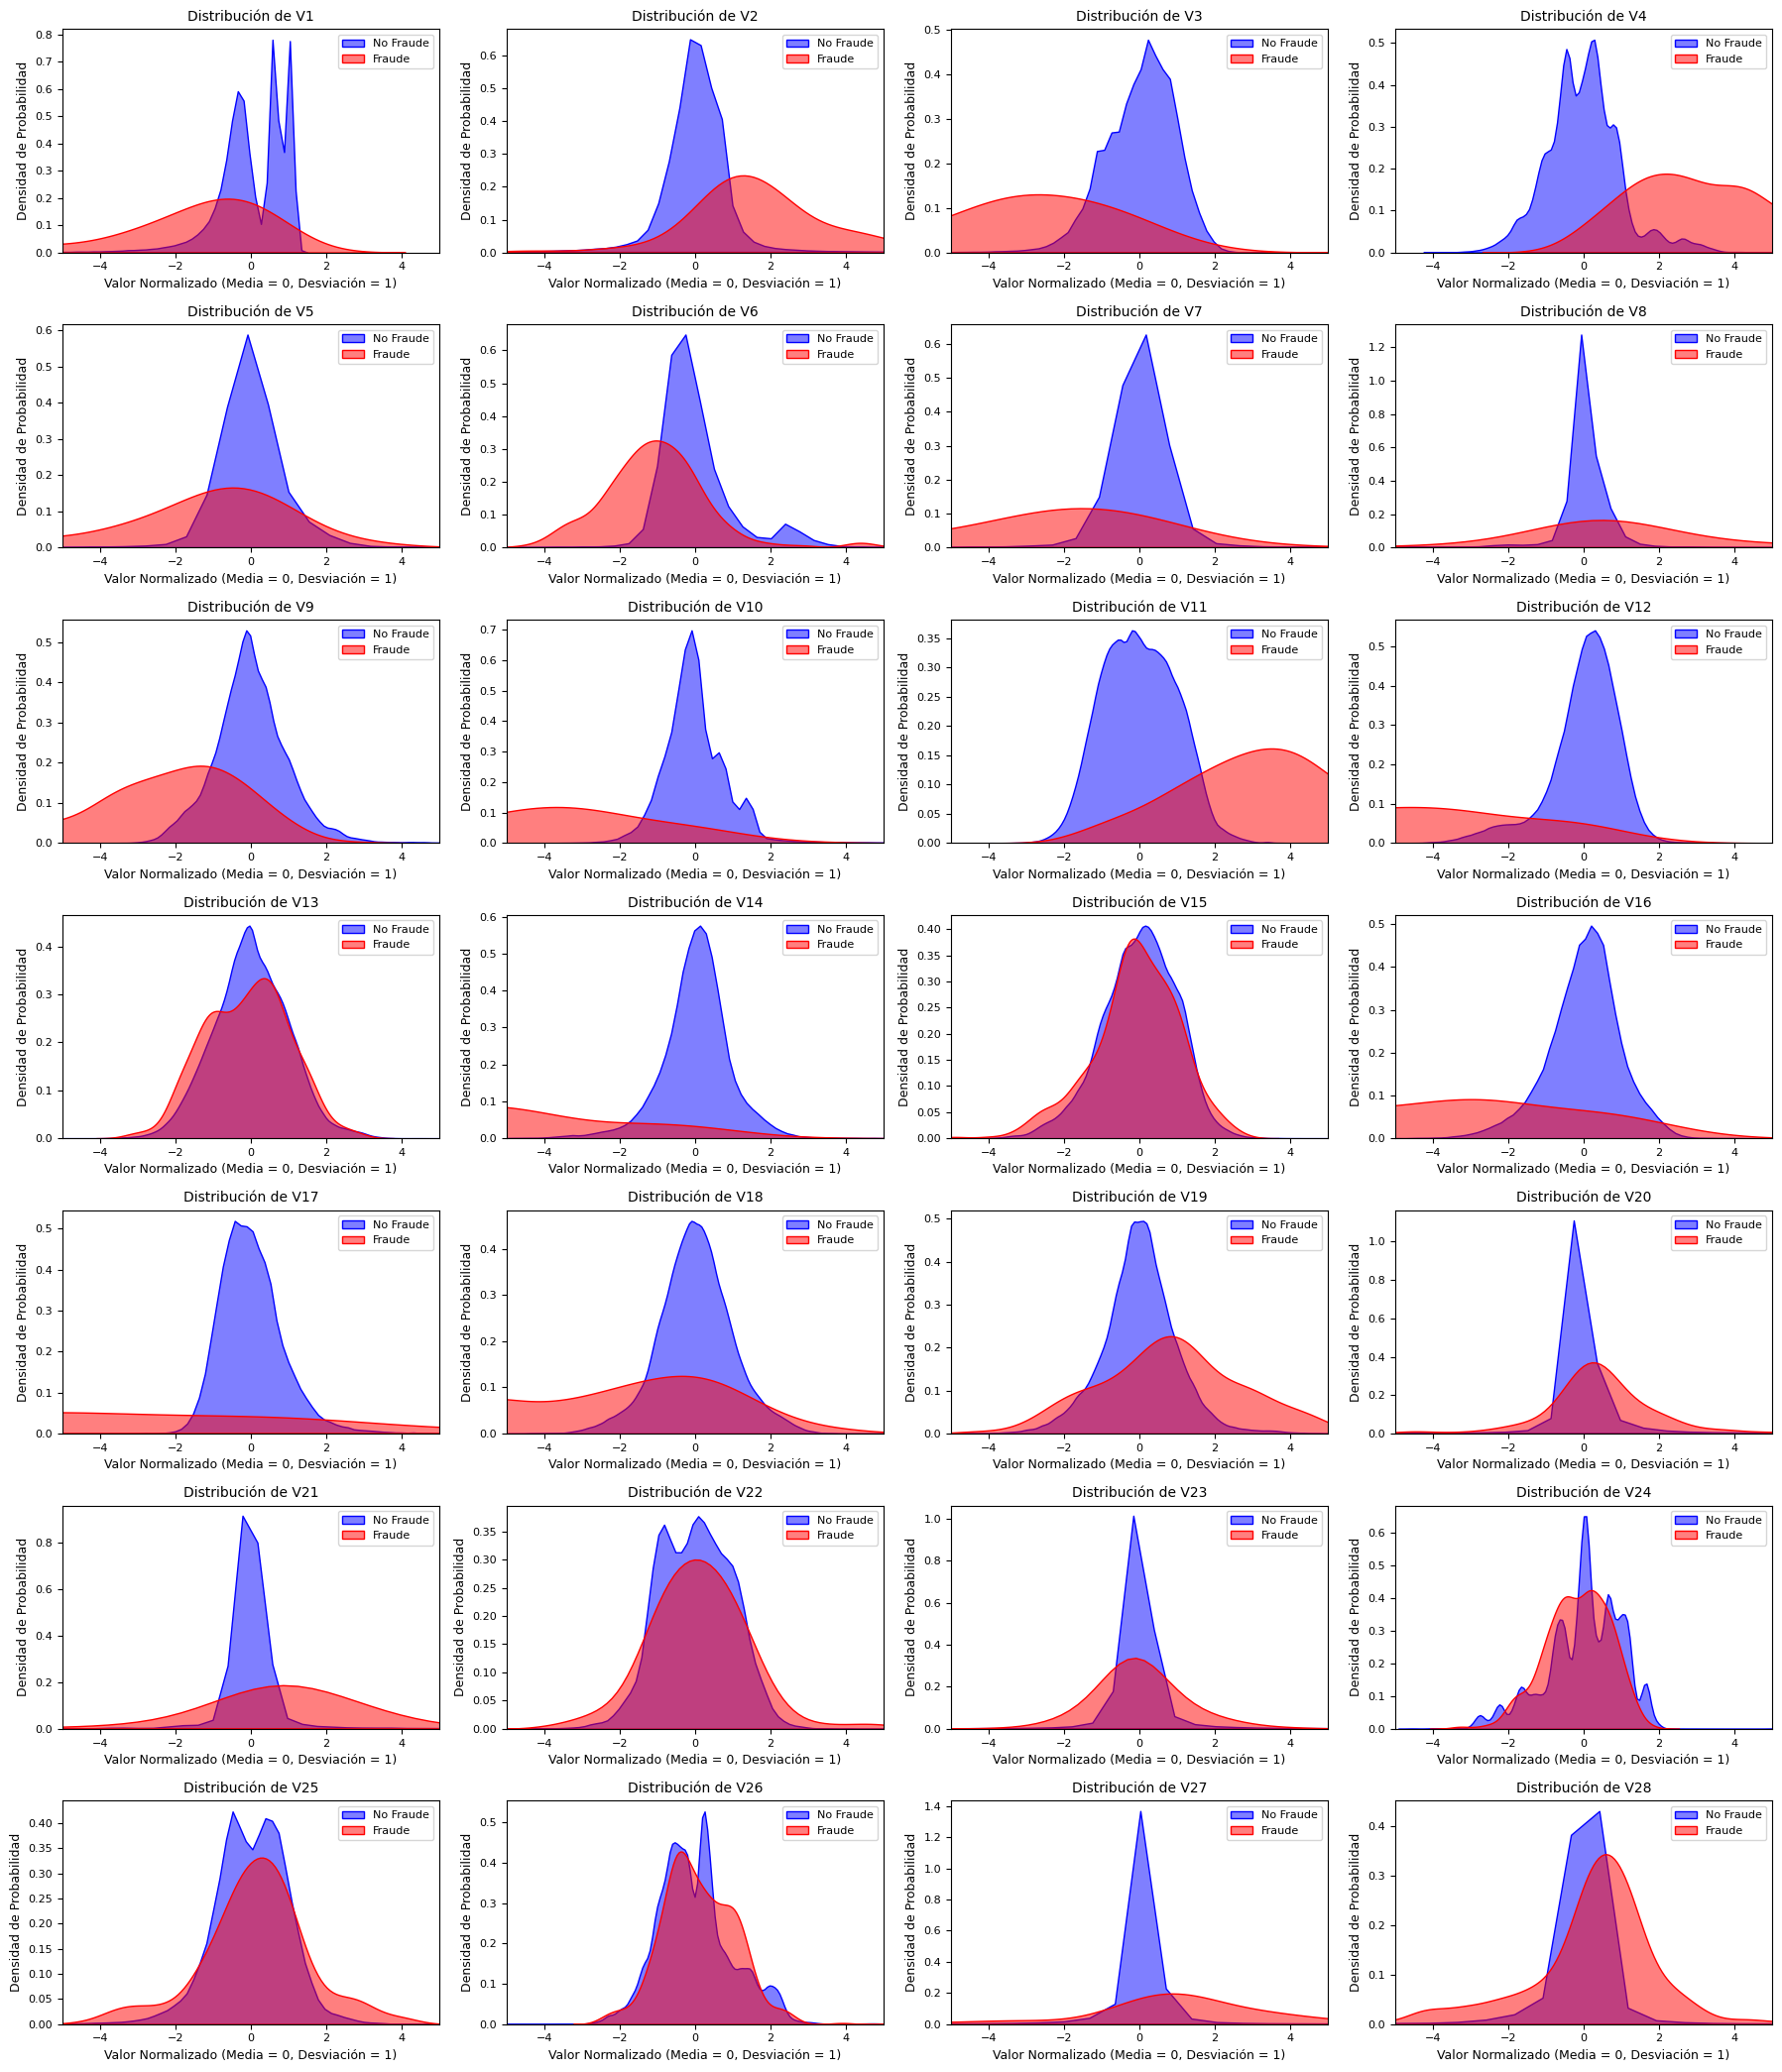

In [ ]:
# Variables anonimizadas V1 - V28
features = df.columns[1:29]

# Normalizar los valores para que las distribuciones sean comparables
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Dividir dataset en fraude y no fraude
fraud_cases = df_scaled[df_scaled["Class"] == 1]
non_fraud_cases = df_scaled[df_scaled["Class"] == 0]

# Definir el número de columnas y filas para mejorar la legibilidad
num_cols = 4  # Número de columnas por fila
num_rows = int(np.ceil(len(features) / num_cols))  # Número de filas dinámico

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 3))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.kdeplot(non_fraud_cases[col], ax=axes[i], label="No Fraude", color="blue", fill=True, alpha=0.5)
    sns.kdeplot(fraud_cases[col], ax=axes[i], label="Fraude", color="red", fill=True, alpha=0.5)
    
    # Mejorar etiquetas y títulos
    axes[i].set_title(f"Distribución de {col}", fontsize=10)
    axes[i].set_xlabel("Valor Normalizado (Media = 0, Desviación = 1)", fontsize=9)
    axes[i].set_ylabel("Densidad de Probabilidad", fontsize=9)
    
    # Ajustar ticks para que todas las gráficas tengan la misma escala en X
    axes[i].set_xlim(-5, 5)  # Limitar el rango de los valores normalizados
    axes[i].tick_params(axis='both', which='major', labelsize=8)  # Reducir tamaño de números en ejes
    
    # Agregar leyenda con mejor posición
    axes[i].legend(loc="upper right", fontsize=8)

# Ajustar el diseño
plt.tight_layout()
plt.show()

### 🔍 ¿Cómo interpretar estos gráficos?

Para cada variable (V1-V28), debemos observar si la distribución de fraudes (rojo) es diferente a la de no fraudes (azul).

#### 1️⃣ Si la curva roja y azul son similares → La variable NO es útil

📌 Ejemplo: Si en V5, ambas curvas se superponen completamente, significa que las transacciones fraudulentas y no fraudulentas se comportan igual en esa variable.

👉 Conclusión: No aporta información útil y podríamos eliminarla en el modelo.

#### 2️⃣ Si la curva roja está desplazada respecto a la azul → La variable SÍ es útil

📌 Ejemplo: Si en V12, las transacciones fraudulentas tienen valores más bajos que las legítimas, significa que las transacciones fraudulentas tienden a comportarse de manera diferente en esta variable.

👉 Conclusión: Esta variable puede ser un buen predictor de fraude.

#### 3️⃣ Si la curva roja es más estrecha o más ancha que la azul → Hay una diferencia en la variabilidad

📌 Ejemplo: En V17, la curva roja es más estrecha que la azul, lo que indica que las transacciones fraudulentas están más concentradas en ciertos valores, mientras que las no fraudulentas son más dispersas.

👉 Conclusión: Puede ser una variable clave para la detección de fraude, ya que los fraudes siguen un patrón más específico.


#### 4️⃣ Si la curva roja tiene múltiples picos → Posible multimodalidad

📌 Ejemplo: En V9, la curva roja muestra varios picos en diferentes valores, lo que podría indicar varios patrones de fraude.

👉 Conclusión: Podría ser útil segmentar los fraudes en diferentes tipos o comportamientos.

# Análisis de Variables Más Importantes para la Detección de Fraude

Este análisis nos ayuda a identificar qué variables tienen mayor impacto en la predicción de fraudes dentro del dataset. Al conocer qué características son las más relevantes, podemos:

✅ Reducir la cantidad de variables innecesarias, lo que mejora la eficiencia del modelo.

✅ Evitar el ruido en el modelo, ya que algunas variables pueden no aportar información valiosa.

✅ Optimizar el tiempo de entrenamiento, reduciendo la complejidad del modelo sin perder precisión.

🔹 ¿Cómo determinamos la importancia de las variables?

Para medir qué tan importantes son las variables, usamos Random Forest, que es un modelo basado en árboles de decisión.

🔹 ¿Por qué Random Forest?

Este modelo evalúa automáticamente la importancia de cada variable al tomar decisiones de clasificación.
Funciona bien con datos desbalanceados, como en nuestro caso (pocos fraudes).
Puede capturar interacciones no lineales entre las variables.

📌 Técnica utilizada: "Feature Importance" (Importancia de Variables)

El modelo asigna un puntaje a cada variable según cuánto contribuye a reducir la incertidumbre en la predicción de fraude.

C:\Users\furio\AppData\Local\Temp\ipykernel_16956\502217380.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")


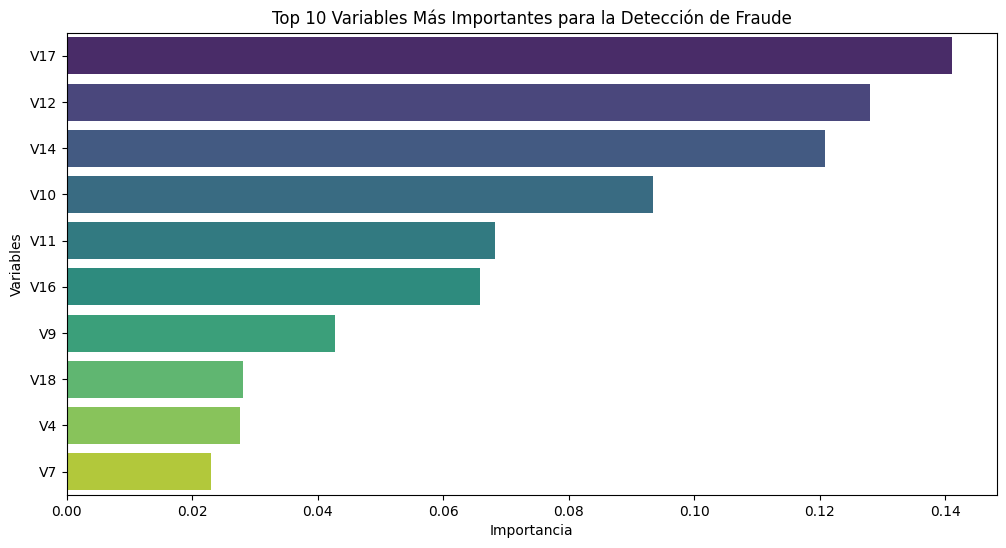

In [ ]:
# Seleccionar features y target
X = df.drop(columns=["Class"])
y = df["Class"]

# Entrenar modelo base
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Obtener importancia de variables
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 Variables Más Importantes para la Detección de Fraude")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.show()


🔍 ¿Cómo interpretar el gráfico de Feature Importance?

Este gráfico muestra las 10 variables más importantes en la predicción de fraudes.

1️⃣ Las variables en la parte superior del gráfico tienen mayor impacto en la clasificación.

Por ejemplo, si V17 es la más importante, significa que hay una fuerte diferencia en cómo se comporta esta variable en fraudes y no fraudes.

2️⃣ Si algunas variables tienen una importancia cercana a 0, significa que no aportan mucho al modelo y podríamos eliminarlas.

3️⃣ Si Amount está en el top 10, quiere decir que el monto de la transacción es un factor importante para detectar fraudes.

4️⃣ Si V12 tiene alta importancia, podríamos investigar si las transacciones fraudulentas tienen valores de V12 significativamente distintos a las normales.

📌 ¿Cómo utilizamos esta información para mejorar el modelo?

✅ Podemos eliminar variables poco relevantes para reducir la complejidad del modelo.

✅ Podemos usar solo las variables más importantes en modelos como Logistic Regression o XGBoost, que pueden beneficiarse de menos features.

✅ Podemos entender mejor el fraude, identificando qué características influyen en las transacciones fraudulentas.